In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')
# Kkma로 명사 분석

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')
# Kkma로 형태소 분석

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')
# Hannanum으로 명사 분석

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')
# Hannanum으로 형태 분석

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')
# Hannanum으로 형태소 분석

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Okt
t = Okt()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')
# Okt(Twitter)로 명사 분석

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')
# Okt(Twitter)로 형태 분석

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')
# Okt(Twitter)로 형태소 분석

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

In [13]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [14]:
text = open('../data/07. alice.txt').read()
alice_mask = np.array(Image.open('../data/07. alice_mask.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")
# said라는 단어를 STOPWORDS에 등록하여 카운트에서 제거

In [15]:
import matplotlib.pyplot as plt
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unkown system... sorry~~~~')
%matplotlib inline    

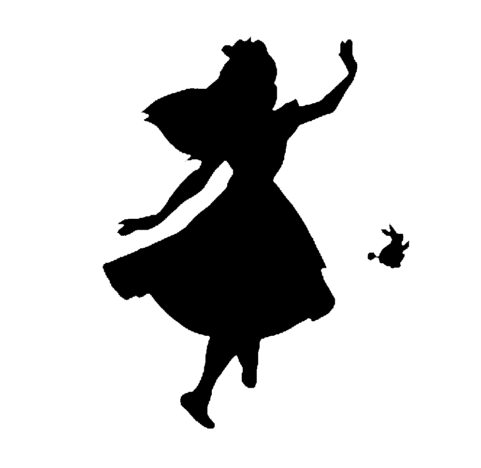

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()
# cmap=plt.cm.gray로 색 설정

In [17]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords = stopwords)
wc = wc.generate(text)
wc.words_
# alice.txt를 읽어 빈도순으로 text 정렬

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

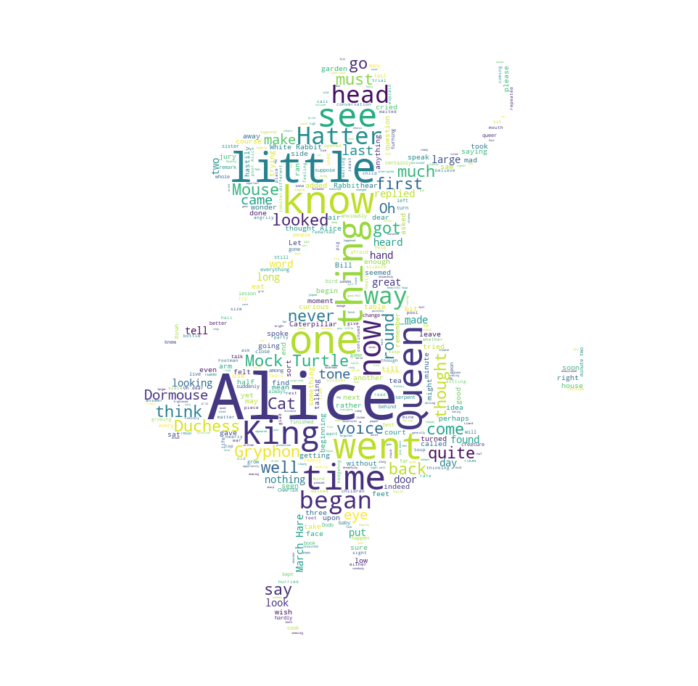

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
text = open('../data/09. a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')
mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

In [20]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [21]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10, random_state=1).generate(text)
default_colors = wc.to_array()

In [22]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
# 전체적으로 색상을 회색으로 채우기위해 설정함

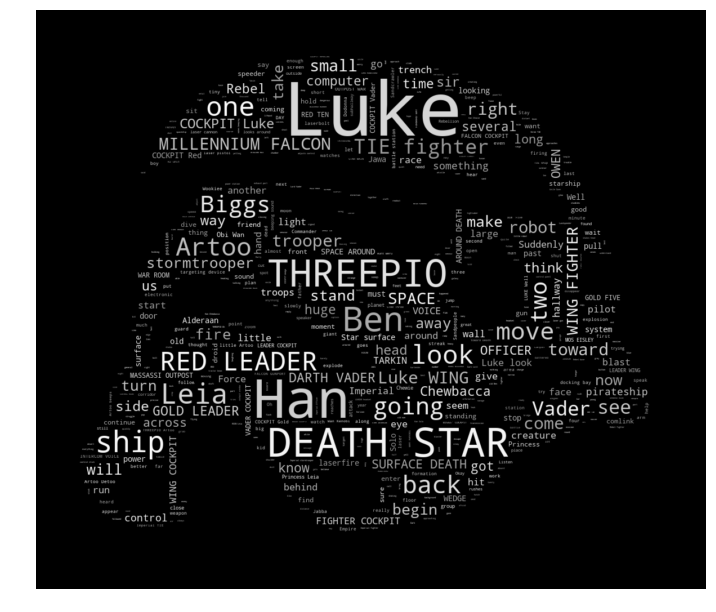

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
import nltk

In [25]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [26]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [27]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [28]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [29]:
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()
# 수집된 단어의 횟수
# 수집된 단어의 고유한 횟수

735
250


FreqDist({'가능': 4,
          '가정': 7,
          '각': 1,
          '값': 2,
          '개': 1,
          '개정': 8,
          '개정안': 3,
          '거나': 1,
          '것': 6,
          '것임': 2,
          '경비': 1,
          '경우': 16,
          '고': 1,
          '고용': 14,
          '고용노동부': 3,
          '곧': 1,
          '공무원': 10,
          '공포': 1,
          '관': 2,
          '관련': 2,
          '교육': 4,
          '구조': 1,
          '국가': 2,
          '국가공무원': 2,
          '국회예산정책처': 2,
          '규정': 1,
          '규칙': 1,
          '근거': 1,
          '근로자': 3,
          '급여': 8,
          '기': 1,
          '기간': 1,
          '기업체': 1,
          '기자': 1,
          '김': 1,
          '김을동': 1,
          '김정훈': 1,
          '김학송': 1,
          '나이': 2,
          '날': 1,
          '남녀': 1,
          '내용': 1,
          '논의': 1,
          '느': 1,
          '다만': 1,
          '다시': 1,
          '다음': 5,
          '단서': 1,
          '단위': 1,
          '달': 1,
          '대비': 1,
          '대상': 2,
   

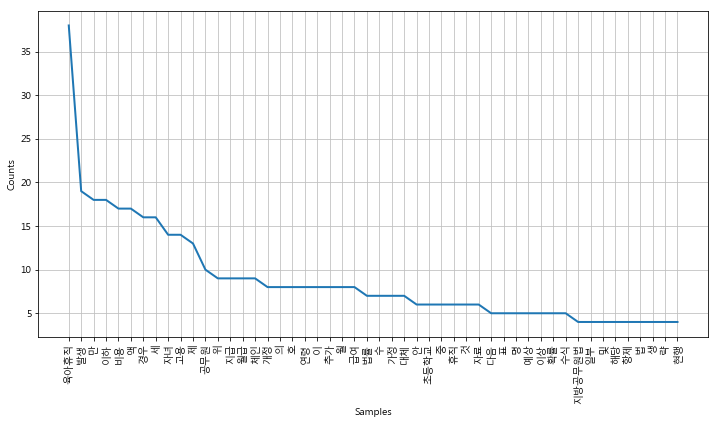

In [30]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [31]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').',
             'x', '의', '자', '에', '안', '번',
             '호', '을', '이', '다', '만', '로', '가', '를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko
# 의미없는 단어 전처리

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

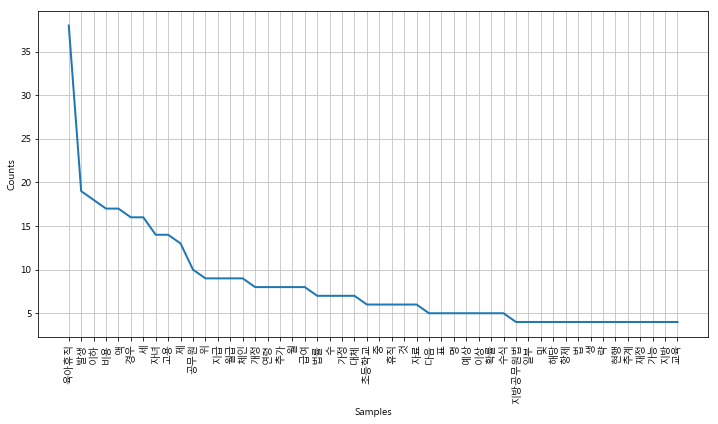

In [32]:
ko = nltk.Text(ko, name = '대한민국 국회 의안 제 1809890호')
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [33]:
ko.count('초등학교')

6

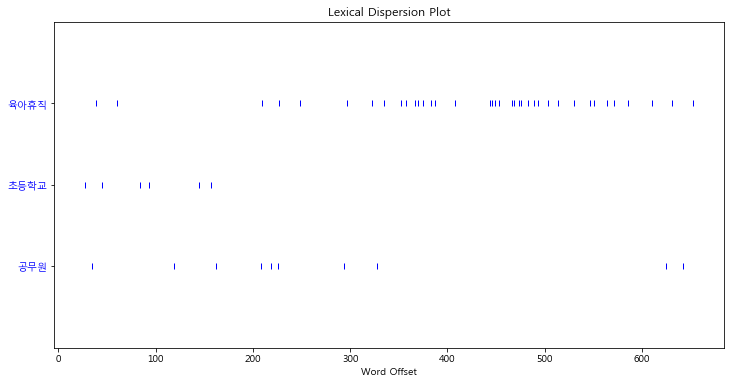

In [34]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])
# 어떤 단어가 문서 내에서 몇 번 언급되었는지 확인함

In [35]:
ko.concordance('초등학교')
# 원하는 단어의 문서 내 위치를 개략적으로 그 분랴과 함께 알 수 있음

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [36]:
ko.collocations()
# 원하는 단어의 주변부 단어까지 같이 확인 함

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


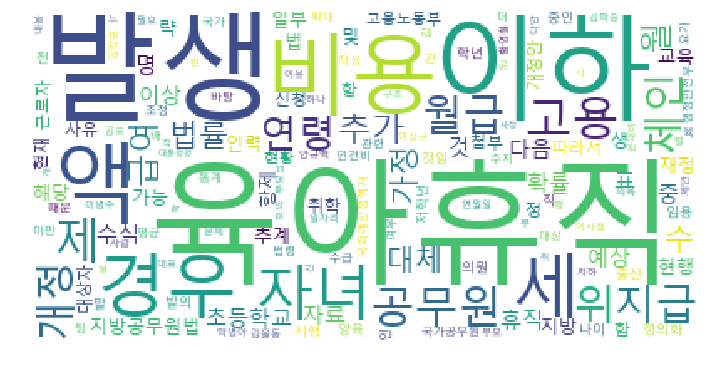

In [37]:
data = ko.vocab().most_common(150)
wordcloud = WordCloud(font_path='c:Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2, background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# font_path로 글꼴 설정

In [38]:
from nltk.tokenize import word_tokenize
import nltk

In [39]:
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

In [40]:
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words
# train 첫 문장에서 사용된 전체 단어를 저장

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [41]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
    for x in train]
t
# 저장된것을 기준으로 train 전체 문장에 속한 단어인지 아닌지를 기록

[({'hate': False,
   'her': False,
   'i': True,
   'like': True,
   'me': False,
   'you': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'i': True,
   'like': False,
   'me': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': False,
   'i': False,
   'like': True,
   'me': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'i': True,
   'like': True,
   'me': False,
   'you': False},
  'pos')]

In [42]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()
# train 문장에 붙은 pos/neg 태그를 이용해서 긍정 부정 비율구함

Most Informative Features
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0


In [43]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'hate': False,
 'her': False,
 'i': True,
 'like': True,
 'me': False,
 'you': False}

In [44]:
classifier.classify(test_sent_features)

'pos'

In [45]:
from konlpy.tag import Okt

In [46]:
pos_tagger = Okt()

In [47]:
train = [('메리가 좋아', 'pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해', 'neg'),
        ('메리는 이쁜 고양이야', 'pos'),
        ('난 마치고 메리랑 놀거야', 'pos')]

In [48]:
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words
# 한글을 형태소 분석없이 적용하였을때를 봄

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [49]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
    for x in train]
t

[({'고양이도': False,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': True,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': True,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': True,
   '이쁜': False,
   '좋아': False,
   '지루해': True},
  'neg'),
 ({'고양이도': False,
   '고양이야': True,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': True,
   '메리랑': False,
   '수업이': False,
   '이쁜': True,
   '좋아': False,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': True,
   '마치고': True,
   '메리가': False,
   '메리는': False,
   '메리랑': True,
   '수업이': False,
   '이쁜': 

In [50]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [51]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [52]:
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'고양이도': False,
 '고양이야': False,
 '난': True,
 '놀거야': True,
 '마치고': False,
 '메리가': False,
 '메리는': False,
 '메리랑': True,
 '수업이': True,
 '이쁜': False,
 '좋아': False,
 '지루해': False}

In [53]:
classifier.classify(test_sent_features)
# 긍정이 나와야할 단어가 부정이나옴

'neg'

In [54]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]
# 단어/형태소 형태로 정리

In [55]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [56]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [57]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [58]:
train_xy = [(term_exists(d),c) for d,c in train_docs]
train_xy

[({'가/Josa': True,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': True,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': True,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': True,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': True,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': True,
   '야/Josa': False,
   '이/Josa': True,
   '이쁘다/Adjective': False,


In [59]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [60]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [61]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [62]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('놀거야', 'Verb'): False,
 ('랑', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('메리', 'Noun'): False,
 ('면', 'Josa'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False}

In [63]:
classifier.classify(test_sent_features)
# 형태소 분석을 하니 긍정으로 나옴

'pos'

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
# 문장의 유사도를 측정하기위해 벡터 간 거리를 구하는 방법을 사용

In [65]:
vectorizer = CountVectorizer(min_df = 1)
# 최소 1번(빈도)이라도 나온 단어 벡터화

In [66]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
           '메리는 공원에서 산책하고 노는 것을 싫어해요',
           '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
           '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [67]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()
# 형태소분석을 하지 않았을때는 메리랑과 메리는은 다른단어라고 나옴

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [68]:
from konlpy.tag import Okt
t = Okt()

In [69]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens
# 형태소분석을 하니 메리랑 메리는을 메리로 분리해서 같은 단어로 봄

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [70]:
contents_for_vectorize = []
for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)
contents_for_vectorize    
# 띄어쓰기로 구분하고 하나의 문장으로 만듬

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [71]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [72]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [73]:
X.toarray().transpose()
# 문장을 벡터화함

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [74]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]
new_post_for_vectorize = []
for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)
new_post_for_vectorize    

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [75]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [76]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [77]:
import scipy as sp
def dist_raw(v1,v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [78]:
best_doc = None
best_dist = 65535
best_i = None

In [79]:
for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f : %s" %(i,d,contents[i]))
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00 : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [80]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [81]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [82]:
def dist_norm(v1,v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [83]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89 : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [84]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [85]:
def tfidf(t,d,D):
    tf=float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D))/(len([doc for doc in D if t in doc])))
    return tf, idf
# tf(term frequency) idf(inverse document frequency) 텍스트마이닝에서 사용하는 일종의 단어별로 부과하는 가중치 개념 적용
# tf는 문서내에서 자주 등장할수록 중요도가 높을 것
# idf 비교하는 모든문서에 같은 단어가있으면 문서간 비교에서는 중요한 단어가 아니라고 봄

In [86]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]
print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [88]:
contents_tokens = [t.morphs(row) for row in contents]
contents_for_vectorize = []
for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)
X=vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(4, 20)

In [89]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [90]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]
new_post_for_vectorize = []
for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)
new_post_for_vectorize    

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [91]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [92]:
best_doc = None
best_dist = 65535
best_i = None
for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("==Post %i with dist=%.2f : %s" %(i,d,contents[i]))
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

==Post 0 with dist=0.90 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
==Post 1 with dist=1.18 : 메리는 공원에서 산책하고 노는 것을 싫어해요
==Post 2 with dist=1.16 : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
==Post 3 with dist=1.41 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


In [93]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unkown system... sorry~~~')
plt.rcParams['axes.unicode_minus'] = False
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib.parse as rep
import urllib
import time

In [94]:
tmp1 = 'https://search.naver.com/search.naver?where=kin&sm=tab_jum&query='
quote = rep.quote_plus("미세먼지")
url = tmp1 + quote
html = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
response = urlopen(html)
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')
# quote_plus로 검색어 입력
# user-agent를 사용하여 검색차단 우회

In [95]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
tmp_list  

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    오늘 날씨   초미세먼지   오늘의날씨   서울날씨   미세먼지 주의보   황사   날씨   내일날씨   현재미세먼지   전국날씨     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  미세먼지 나쁜날 야외훈련   2018.12.28.   OO부대가 미세먼지 나쁨단계 인데도 야외훈련을 하고 있네요, 장병들의 건강이 걱정됩니다.   답변 안녕하십니까 귀하께서는 미세먼지 나쁨단계에 있는 날씨에 야외훈련을 하는것에 대해 우려를 표현하셨습니다. 2. 우리 군에서는 각종훈련 간 미세먼지 환경기준 예...    지식파트너 답변 닉네임국민신문고   ',
 '  질문  알리바바에서 미세먼지 마스크를 사다가   2019.01.21.   1.알리바바에서 미세먼지 마스크를 사다가 한국시장에서 쿠팡이나 지마켓 네이버스토어 등에서 팔고 싶습니다 무엇부터 시작해야할까요?? 2.수입하는 품목도 여러가지...   답변 미세먼지 마스크는 의약외품에 해당하므로 수입을 위해서는 식품의약품안전처장에게 수입업신고를 해야 하고, 수입시마다 한국의약품수출입협회장에게...    관세사 답변 닉네임임형철   ',
 '  질문  우리나라에서 황사나 미세먼지가 가장   2018.11.27.   우리나라에서 황사나 미세먼지가 가장 심했던 때는 언제인가요?   답변 황사일수와 미세먼지 농도에 관한 데이터는 기상자료개방포털에서 확인하실 수 있습니다. https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112...    지식파트너 답변 닉네임기상청   ',
 '  질문  내일 쌍수하는데 지

In [96]:
from tqdm import tqdm_notebook
present_candi_text = []
for n in tqdm_notebook(range(1, 10000, 10)):
    tmp1 = 'https://search.naver.com/search.naver?where=kin&sm=tab_jum&query='
    quote = rep.quote_plus("미세먼지")
    url = tmp1 + quote
    html = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(html)
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(0.5)
# 네이버 지식IN에 미세먼지 검색어로 답변 1만개 추출함

A Jupyter Widget

In [97]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    오늘 날씨   초미세먼지   오늘의날씨   서울날씨   미세먼지 주의보   황사   날씨   내일날씨   현재미세먼지   전국날씨     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  미세먼지 나쁜날 야외훈련   2018.12.28.   OO부대가 미세먼지 나쁨단계 인데도 야외훈련을 하고 있네요, 장병들의 건강이 걱정됩니다.   답변 안녕하십니까 귀하께서는 미세먼지 나쁨단계에 있는 날씨에 야외훈련을 하는것에 대해 우려를 표현하셨습니다. 2. 우리 군에서는 각종훈련 간 미세먼지 환경기준 예...    지식파트너 답변 닉네임국민신문고   ',
 '  질문  알리바바에서 미세먼지 마스크를 사다가   2019.01.21.   1.알리바바에서 미세먼지 마스크를 사다가 한국시장에서 쿠팡이나 지마켓 네이버스토어 등에서 팔고 싶습니다 무엇부터 시작해야할까요?? 2.수입하는 품목도 여러가지...   답변 미세먼지 마스크는 의약외품에 해당하므로 수입을 위해서는 식품의약품안전처장에게 수입업신고를 해야 하고, 수입시마다 한국의약품수출입협회장에게...    관세사 답변 닉네임임형철   ',
 '  질문  우리나라에서 황사나 미세먼지가 가장   2018.11.27.   우리나라에서 황사나 미세먼지가 가장 심했던 때는 언제인가요?   답변 황사일수와 미세먼지 농도에 관한 데이터는 기상자료개방포털에서 확인하실 수 있습니다. https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112...    지식파트너 답변 닉네임기상청   ',
 '  질문  내일 쌍수하는데 지

In [98]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [99]:
present_text = ''
for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'
# 하나의 글로 present_test에 저장    

In [100]:
tokens_ko = t.morphs(present_text)
tokens_ko
# 1만개 문장에서 형태소 분석을 마친 단어를 저장

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '오늘',
 '날씨',
 '초미세먼지',
 '오늘',
 '의',
 '날씨',
 '서울',
 '날씨',
 '미세먼지',
 '주의보',
 '황사',
 '날씨',
 '내',
 '일',
 '날씨',
 '현재',
 '미세먼지',
 '전국',
 '날씨',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '미세먼지',
 '나쁜',
 '날',
 '야외',
 '훈련',
 '2018.12',
 '.',
 '28',
 '.',
 'OO',
 '부대',
 '가',
 '미세먼지',
 '나쁨',
 '단계',
 '인데도',
 '야외',
 '훈련',
 '을',
 '하고',
 '있네요',
 ',',
 '장병',
 '들',
 '의',
 '건강',
 '이',
 '걱정',
 '됩니다',
 '.',
 '답변',
 '안녕하십니까',
 '귀하',
 '께서는',
 '미세먼지',
 '나쁨',
 '단계',
 '에',
 '있는',
 '날씨',
 '에',
 '야외',
 '훈련',
 '을',
 '하는것

In [101]:
ko = nltk.Text(tokens_ko, name='미세먼지')
print(len(ko.tokens))
print(len(set(ko.tokens)))
# 총 단어 712190개 중복제외 444개

712190
442


In [102]:
ko = nltk.Text(tokens_ko, name='미세먼지')
ko.vocab().most_common(100)
# 가장 많이 나오는 단어 100개

[('.', 35377),
 ('미세먼지', 27686),
 ('답변', 16149),
 ('에', 14611),
 ('...', 12304),
 ('이', 10766),
 ('의', 9231),
 ('에서', 8459),
 ('를', 7693),
 ('질문', 7690),
 ('을', 7690),
 ('닉네임', 7690),
 ('위', 6921),
 ('공기청정기', 6921),
 ('날씨', 6158),
 ('?', 6153),
 (',', 6152),
 ('필터', 6152),
 ('가', 5384),
 ('닉스', 5383),
 ('하는', 4617),
 ('는', 4615),
 ('지식', 4614),
 ('도', 4614),
 ('중', 4614),
 ('은', 4614),
 ('제로', 4614),
 ('단어', 3850),
 ('2', 3845),
 ('파트너', 3845),
 ('입니다', 3845),
 ('국가', 3845),
 ('차량', 3845),
 ('검색', 3080),
 ('사용', 3077),
 ('합니다', 3077),
 ('서울', 3077),
 ('황사', 3077),
 ('훈련', 3076),
 ('들', 3076),
 ('하는데', 3076),
 ('급성', 3076),
 ('부비동염', 3076),
 ('것', 3076),
 ('시', 3076),
 ('톳', 3076),
 ('의한', 3076),
 ('2.0', 3076),
 ('입력', 2310),
 ('때', 2309),
 ('오늘', 2309),
 ('한', 2308),
 ('할', 2308),
 ('후', 2308),
 ('야외', 2307),
 ('하고', 2307),
 ('마스크', 2307),
 ('2019.01', 2307),
 ('해야', 2307),
 ('요', 2307),
 ('수입', 2307),
 ('나', 2307),
 ('가장', 2307),
 ('2018.11', 2307),
 ('..', 2307),
 ('좋은', 2307),
 ('재

In [103]:
stop_words = ['.', '답변', '에', '...', '이', '의', '에서', '를', '질문', '을',
              '닉네임', '?', ',', '가', '하는', '는', '도', '중', '은', '단어',
              '2', '입니다', '검색', '들', '것', '시', '의한', '때',
              '한', '할', '후', '하고', '2019.01', '해야', '요', '나', '2018.11',
              '..', '-', '연관검색어', '1', '2018.12', '등', '지식', '파트너', '합니다',
              '하는데', '하실', '해서', '됩니다', '땜', '수', '와', '괜찮을까요',
              '하구요', '감사합니다', '로', ]
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name='미세먼지')
ko.vocab().most_common(50)
# stop_words에 의미없는 단어를 넣어 제거

[('미세먼지', 27686),
 ('위', 6921),
 ('공기청정기', 6921),
 ('날씨', 6158),
 ('필터', 6152),
 ('닉스', 5383),
 ('제로', 4614),
 ('국가', 3845),
 ('차량', 3845),
 ('사용', 3077),
 ('서울', 3077),
 ('황사', 3077),
 ('훈련', 3076),
 ('급성', 3076),
 ('부비동염', 3076),
 ('톳', 3076),
 ('2.0', 3076),
 ('입력', 2310),
 ('오늘', 2309),
 ('야외', 2307),
 ('마스크', 2307),
 ('수입', 2307),
 ('가장', 2307),
 ('좋은', 2307),
 ('재발', 2307),
 ('배', 2307),
 ('S', 2307),
 ('XQ', 2307),
 ('600', 2307),
 ('자취', 2307),
 ('으로', 2307),
 ('저', 2307),
 ('감', 2307),
 ('조치', 2307),
 ('부제', 2307),
 ('포함', 1540),
 ('하나', 1539),
 ('개', 1539),
 ('일', 1539),
 ('현재', 1539),
 ('나쁨', 1538),
 ('단계', 1538),
 ('있는', 1538),
 ('알리바바', 1538),
 ('사', 1538),
 ('다가', 1538),
 ('한국', 1538),
 ('이나', 1538),
 ('네이버', 1538),
 ('부터', 1538)]

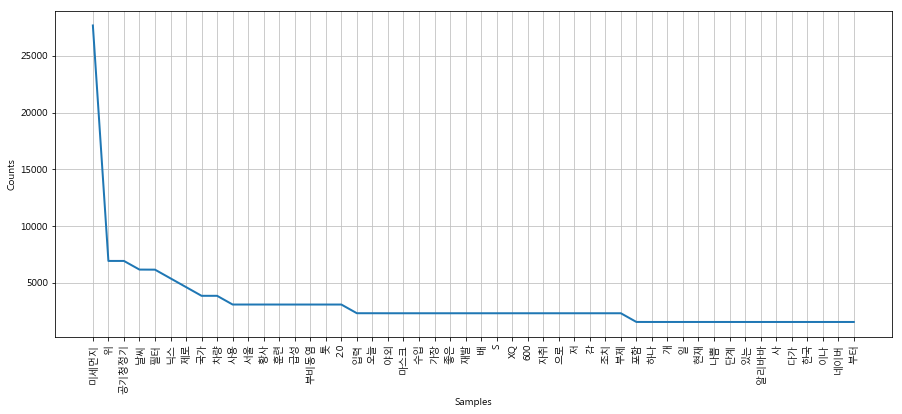

In [104]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()
# 등장 빈도에 따른 그래프
# 공기청정기(위닉스제로2.0) 마스크 국가조치등에 관심이 많음을 알 수 있음

In [105]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

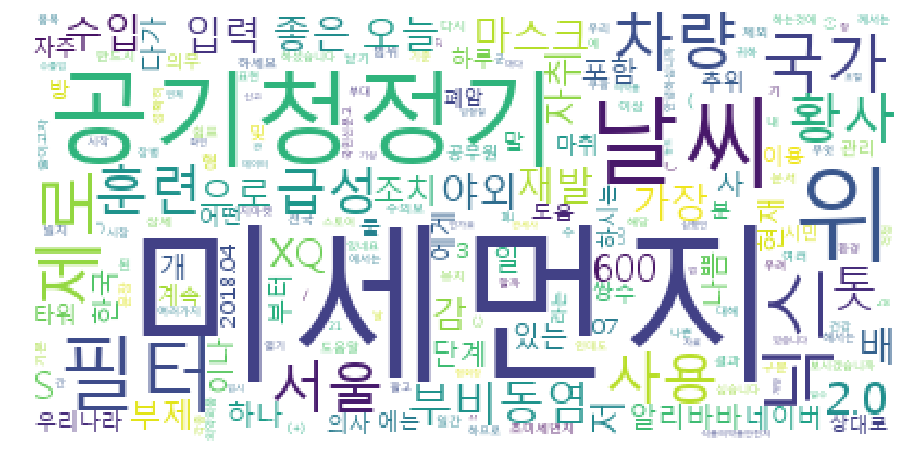

In [106]:
data = ko.vocab().most_common(300)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.5,
                     stopwords=STOPWORDS,
                     background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [107]:
mask = np.array(Image.open('../data/09. heart.jpg'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)
# 이미지파일에 마스킹해서 그림

In [108]:
data = ko.vocab().most_common(200)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.1, mask=mask,
                     background_color='white',
                     min_font_size=1, max_font_size=100).generate_from_frequencies(dict(data))
default_colors = wordcloud.to_array()

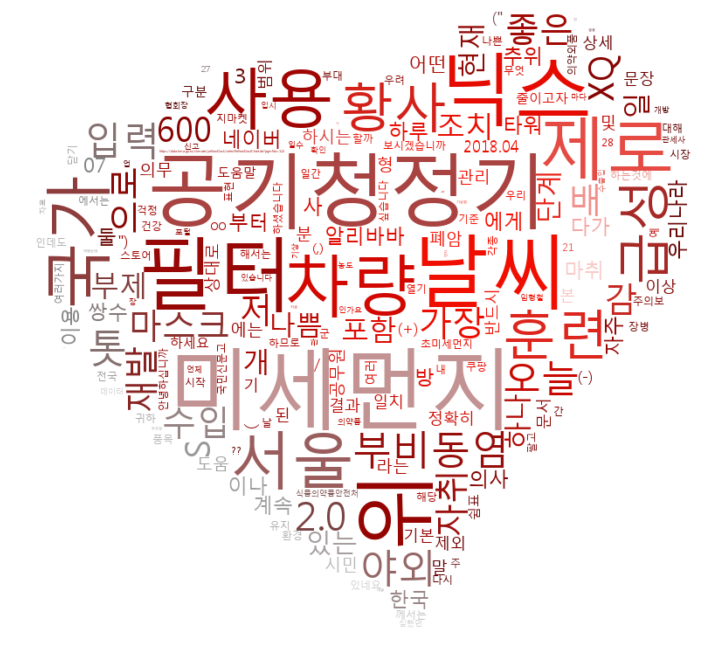

In [109]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()
# 이미지의 색으로 그림

In [110]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

In [111]:
import gensim
from gensim.models import word2vec

In [112]:
twitter = Okt()
results = []
lines = present_candi_text
for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)
# 조사나 어미 등을 제거함    

기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 

질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼

질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 

질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지

질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼

질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변

질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 내용 이다 ▶ 차량 2 부제 실시 대상 서울 시민 및 서 울 지역 출입 하다 시 도민 시민 참여 형 차량 지식 파트너 답변 닉네임 120 다산 콜센터
질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yellowDust/selectYellowDustChart.do?pgmNo=112 지식 파트너 답변 닉네임 기상청
질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 

질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력 기울이다 않다 등 국가 과실 있다 하다 하지만 현재 변호사 답변 닉네임 정 필승
질문 미세먼지 저 감 조치 의하다 차량 2 부제 공 2018.11 07 미세먼지 저 감 조치 의하다 차량 2 부제 공무원 의무 의무 게 출퇴근 시 공공기관 주차 하다 말르다 아니다 서울 경기도 권 공무원 명의 차량 운행 시 답변 ◈ 서울 형 비상 저 감 조치 미세먼지 줄이다 발령 대한 주요 

질문 미세먼지 공기청정기 위 닉스 제로 2.0 필터 교체 2018.11 16 미세먼지 공기청정기 위 닉스 제로 2.0 사용 중 요 공기청정기 처음 사용 하다 거 필터 관리 어떻다 하다 하다 지다 모르다 위 닉스 제품 쓰시 분 들 필터 답변 미세먼지 공기청정기 위 닉스 2.0 필터 관리 및 서비스 우선 위 닉스 공기청정기 관심 가다 주다 감사하다 제로 2.0 총 3 개 필터 프리 필터 탈취 필터 지식 파트너 답변 닉네임 위 닉스
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 오늘 날씨 초미세먼지 오늘 날씨 서울 날씨 미세먼지 주의보 황사 날씨 내 일 날씨 현재 미세먼지 전국 날씨 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 미세먼지 나쁘다 날 야외 훈련 2018.12 28 OO 부대 미세먼지 나쁘다 단계 이다 야외 훈련 하다 있다 장병 들 건강 걱정 되다 답변 안녕하십니까 귀하 미세먼지 나쁘다 단계 있다 날씨 야외 훈련 하다 대해 우려 표현 하다 2 우리 군 각종 훈련 간 미세먼지 환경 기준 예 지식 파트너 답변 닉네임 국민신문고
질문 알리바바 미세먼지 마스크 사 다가 2019.01 21 1 알리바바 미세먼지 마스크 사 다가 한국 시장 쿠팡 지마켓 네이버 스토어 등 팔고 싶다 무엇 시작 하다 하다 요 2 수입 하다 품목 여러가지 답변 미세먼지 마스크 의약외품 해당 하므다 수입 위 하다 식품의약품안전처 장 수입 업 신고 하다 하다 수 입시 한국 의약품 수출입 협회장 관세사 답변 닉네임 임형철
질문 우리나라 황사 미세먼지 가장 2018.11 27 우리나라 황사 미세먼지 가장 심하다 때 언제 답변 황사 일수 미세먼지 농도 관 데이터 기상 자료 개방 포털 확인 하다 수 있다 https://data.kma.go.kr/climate/yello

질문 내일 쌍수 하다 지금 미세먼지 땜 인 2019.01 18 토요일 쌍수 하다 미세먼지 땜 인지 월욜 목 아프다 그 후 계속 기침 심해지다 ㅠㅠ 코 약간 막히다 마취 하다 괜찮다 그리고 하루 여유 있다 병원 답변 처방 받다 안되다 얘기 하다 간혹 수면 마취 하다 미세먼지 상관 없다 오늘 좋다 하루 되다 좋다 답변 되어다 기르다 바라다 감사하다 의사 답변 닉네임 한형 일
질문 급성 부비동염 미세먼지 추위 둘 중 2019.01 07 급성 부비동염 미세먼지 추위 둘 중 하나 있다 날씨 라면 계속 하다 재발 하다 원래 비염 축농증 있다 것 아니다 근 3 개월 이비인후과 항생제 투여 약 답변 안녕하다 하이닥 네이버 지식 iN 상담 이용 배 이다 급성 부비동염 자주 재발 하다 불편하다 많다 듯 하다 급성 부비동염 약물 치료 후 자주 재발 하다 의사 답변 닉네임 이용 배
질문 미세먼지 공기청정기 제로 S 타워 XQ 600 중 어떻다 괜찮다 2018.12 12 자취 방 사용 하다 미세먼지 공기청정기 찾다 있다 제로 S 나 타워 XQ 600 중 어떻다 것 사다 고민 중 이다 자취 방이 하다 제로 S 도 충분하다 하다 분 들 답변 자취 방 미세먼지 공기청정기 추천 미세먼지 공기청정기 고려 시 가장 중요하다 것 필터 성능 청정 면적 이다 문의 주신 XQ 600 의 경우 최 상위 하이엔드 급 20 평 지식 파트너 답변 닉네임 위 닉스
질문 미세먼지 톳 괜찮다 2018.04 03 요즘 미세먼지 때문 말 들 많다 그래서 미세먼지 좀 이기다 미세먼지 도움 되다 음식 찾아보다 톳 좋다 하다 평소 본가 바닷가 답변 톳 체내 쌓이다 중금속 미세먼지 배출 하다 도움 주다 역할 하다 있다 섭취 하다 것 좋다 생각 이다 위 같다 기능 뿐 아니다 톳 시금치 3~4 배 영양사 답변 닉네임 이지은
질문 국가 상대로 미세먼지 의하다 폐암 소 2018.04 11 국가 상대로 미세먼지 의하다 폐암 소송 승소 가능 성리 있다 답변 다음 국가 미세먼지 발생 책임 있다 혹은 국가 미세먼지 예방 위해 어떻다 노력

In [113]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
# DATA파일로 저장    

In [114]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)
model.save('pres_girl.model')
# MODEL파일로 저장

In [115]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [116]:
model.most_similar(positive=['미세먼지'])
# 미세먼지와 유사한 단어 찾음

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('질문', 0.38342341780662537),
 ('황사', 0.29352807998657227),
 ('2018.04', 0.28911978006362915),
 ('들', 0.2862483263015747),
 ('가장', 0.27939680218696594),
 ('어떻다', 0.2722627520561218),
 ('2018.11', 0.24645742774009705),
 ('찾아보다', 0.23441743850708008),
 ('2019.01', 0.23357462882995605),
 ('평소', 0.22188574075698853)]

In [117]:
model.most_similar(positive=['국가'])
# 국가와 유사한 단어 찾음

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('발생', 0.7422599196434021),
 ('책임', 0.7199695110321045),
 ('노력', 0.709803581237793),
 ('예방', 0.7062620520591736),
 ('가능', 0.6990652680397034),
 ('폐암', 0.6925796270370483),
 ('혹은', 0.6902050971984863),
 ('과실', 0.6876406669616699),
 ('성리', 0.6845607161521912),
 ('다음', 0.6838494539260864)]

In [118]:
model.most_similar(positive=['미세먼지', '마스크'])
# 미세먼지 마스크와 유사한 단어를 찾음

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('다가', 0.5243862271308899),
 ('사', 0.5056473016738892),
 ('해당', 0.49235793948173523),
 ('의약외품', 0.475251704454422),
 ('쿠팡', 0.4689119756221771),
 ('팔고', 0.46701496839523315),
 ('시장', 0.4668271541595459),
 ('지마켓', 0.4612722396850586),
 ('스토어', 0.45705291628837585),
 ('한국', 0.45278725028038025)]

In [119]:
model.most_similar(positive=['미세먼지', '공기청정기'])
# 미세먼지 공기청정기와 유사한 단어를 찾음

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('제로', 0.5708191394805908),
 ('필터', 0.5116492509841919),
 ('분', 0.4819813370704651),
 ('관리', 0.4663817286491394),
 ('들', 0.45933985710144043),
 ('지다', 0.44141513109207153),
 ('어떻다', 0.4343511164188385),
 ('자취', 0.4300169050693512),
 ('처음', 0.4266262650489807),
 ('2.0', 0.4190608263015747)]

In [120]:
model.most_similar(positive=['미세먼지'], negative=['마스크'])
# 미세먼지에서 마스크를 뺌

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('질문', 0.20104828476905823),
 ('2018.04', 0.16608205437660217),
 ('좀', 0.14360195398330688),
 ('어떻다', 0.14140726625919342),
 ('말', 0.13869261741638184),
 ('들', 0.1339171826839447),
 ('가장', 0.12996524572372437),
 ('되다', 0.12957695126533508),
 ('이기다', 0.12074311077594757),
 ('찾아보다', 0.11856912821531296)]

In [121]:
model.most_similar(positive=['미세먼지'], negative=['공기청정기'])
# 미세먼지에서 공기청정기를 뺌

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('의하다', 0.15453818440437317),
 ('질문', 0.15143246948719025),
 ('찾아보다', 0.14948096871376038),
 ('주', 0.14260032773017883),
 ('권', 0.13392895460128784),
 ('음식', 0.12840165197849274),
 ('황사', 0.12659624218940735),
 ('2018.04', 0.12385111302137375),
 ('11', 0.12369632720947266),
 ('폐암', 0.11978934705257416)]